In [16]:
import io
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
df2 = pd.read_csv('dataset.csv')
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


6354407
8213
Percentage frauds: 0.0012924888191769902


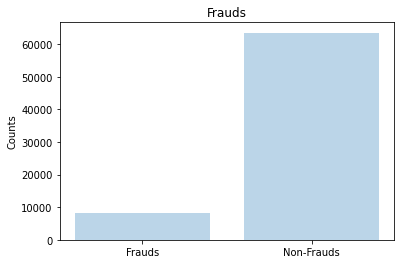

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
type(df2)
frauds = list(df2['isFraud'])
frauds

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
    if(i==0):
       count_0 += 1
    else:
        count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0)

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))
performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

In [18]:
# the below data nad plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(df2.loc[df2.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
# fraud_count = trans_data.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = df2.loc[(df2['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<Axes: >

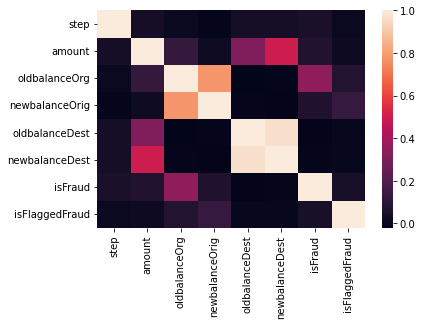

In [19]:
sns.heatmap(trans_data_new.corr())

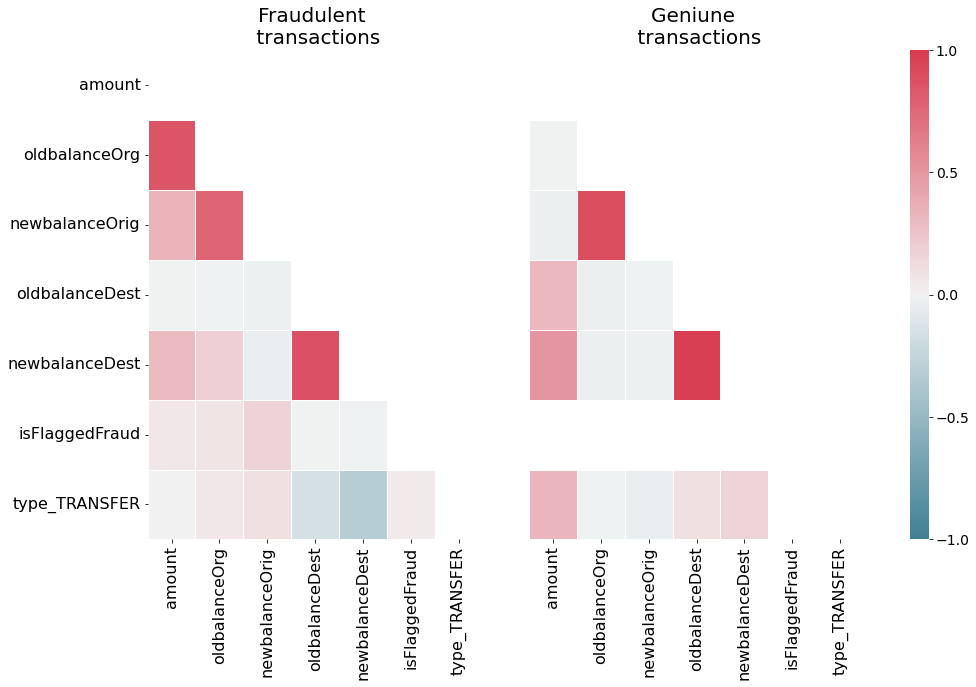

In [20]:
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]
                  
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [21]:
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
C_threshold=[0.001, 0.01, 0.1, 1]
max=0
best_parameter=0
for alpha in C_threshold:
  lr = LogisticRegression(C = alpha, penalty = 'l1',solver='liblinear')
  y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

  fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
  roc_auc = auc(fpr,tpr)
  if roc_auc>max:
    max=roc_auc
    best_parameter=alpha
print("Best hyperparamter/c-value {}".format(best_parameter))

Best hyperparamter/c-value 1


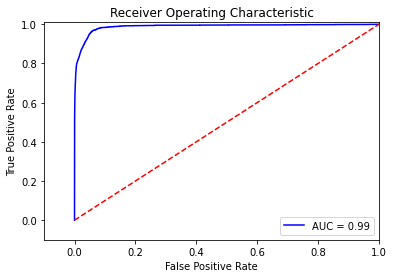

In [23]:
#@title Default title text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
lr = LogisticRegression(C = 1, penalty = 'l1',solver='liblinear')
y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
from imblearn.over_sampling import SMOTE


In [36]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [35]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac = accuracy_score(y_test, y_pred)*100
lr_rs = recall_score(y_test, y_pred)*100
lr_ps = precision_score(y_test, y_pred)*100
lr_fs = f1_score(y_test, y_pred)*100

print('Logistic Regression without applying SMOTE-')
print('Accuracy:',lr_ac,'%')
print('Recall:',lr_rs,'%')
print('Precision:',lr_ps,'%')
print('F1 score:',lr_fs,'%')

#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

X_train, y_train = smt.fit_sample(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac_sm = accuracy_score(y_test, y_pred)*100
lr_rs_sm = recall_score(y_test, y_pred)*100
lr_ps_sm = precision_score(y_test, y_pred)*100
lr_fs_sm = f1_score(y_test, y_pred)*100

print('Logistic Regression with SMOTE-')
print('Accuracy:',lr_ac_sm,'%')
print('Recall:',lr_rs_sm,'%')
print('Precision:',lr_ps_sm,'%')
print('F1 score:',lr_fs_sm,'%')

Logistic Regression without applying SMOTE-
Accuracy: 99.72840681006525 %
Recall: 72.29705132872223 %
Precision: 53.55987055016181 %
F1 score: 61.53369481022464 %


AttributeError: ignored

In [ ]:
# Random Forest method
# this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(X_train,y_train);
# y_pred = rf.predict(X_test)

#without applying SMOTE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred)*100
rf_rs = recall_score(y_test, y_pred)*100
rf_ps = precision_score(y_test, y_pred)*100
rf_fs = f1_score(y_test, y_pred)*100

print('Random Forest Method without applying SMOTE-')
print('Accuracy:',rf_ac,'%')
print('Recall:',rf_rs,'%')
print('Precision:',rf_ps,'%')
print('F1 score:',rf_fs,'%')

#with smote
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac_sm = accuracy_score(y_test, y_pred)*100
rf_rs_sm = recall_score(y_test, y_pred)*100
rf_ps_sm = precision_score(y_test, y_pred)*100
rf_fs_sm = f1_score(y_test, y_pred)*100

print('Random Forest Method with SMOTE-')
print('Accuracy:',rf_ac_sm,'%')
print('Recall:',rf_rs_sm,'%')
print('Precision:',rf_ps_sm,'%')
print('F1 score:',rf_fs_sm,'%')


Random Forest Method without applying SMOTE-
Accuracy: 99.92408953934164 %
Recall: 77.13869676010194 %
Precision: 96.97940503432494 %
F1 score: 85.92862935928629 %
Random Forest Method with SMOTE-
Accuracy: 99.832428205002 %
Recall: 96.21405169275573 %
Precision: 64.92262343404569 %
F1 score: 77.53006746846582 %


In [ ]:
# KNN classifier
# this is to get the independent varaibles
from sklearn.model_selection import cross_val_score

X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,12)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    k_score.append(score.mean())

#print(k_score)
%matplotlib inline
import matplotlib.pyplot as plt
algos = range(1,16)
precisions = np.arange(11)
performance = [0.9986073503739492, 0.998994167616751, 0.9989015038762489, 0.9989844701826799, 0.9989359833519117, 0.9989639979373166, 0.9989402932294092, 0.9989392157593091, 0.9989182048166274, 0.9989289796830663, 0.9989171273378201] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('K_values') 
plt.show()


KeyboardInterrupt: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac = accuracy_score(y_test, y_pred)*100
knn_rs = recall_score(y_test, y_pred)*100
knn_ps = precision_score(y_test, y_pred)*100
knn_fs = f1_score(y_test, y_pred)*100

print('KNN Method without applying SMOTE-')
print('Accuracy:',knn_ac,'%')
print('Recall:',knn_rs,'%')
print('Precision:',knn_ps,'%')
print('F1 score:',knn_fs,'%')

#with SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac_sm = accuracy_score(y_test, y_pred)*100
knn_rs_sm = recall_score(y_test, y_pred)*100
knn_ps_sm = precision_score(y_test, y_pred)*100
knn_fs_sm = f1_score(y_test, y_pred)*100

print('KNN Method with SMOTE-')
print('Accuracy:',knn_ac_sm,'%')
print('Recall:',knn_rs_sm,'%')
print('Precision:',knn_ps_sm,'%')
print('F1 score:',knn_fs_sm,'%')

In [ ]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,learning_rate=0.05,max_depth=4)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)*100
xgb_rs = recall_score(y_test, y_pred)*100
xgb_ps = precision_score(y_test, y_pred)*100
xgb_fs = f1_score(y_test, y_pred)*100

print('XGBoost without applying SMOTE-')
print('Accuracy:',xgb_ac,'%')
print('Recall:',xgb_rs,'%')
print('Precision:',xgb_ps,'%')
print('F1 score:',xgb_fs,'%')

#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
xgb = XGBClassifier(n_estimators=100,learning_rate=0.09,max_depth=4)
xgb.fit(X_train, y_train)
X_test = X_test.to_numpy()
y_pred = xgb.predict(X_test)

xgb_ac_sm = accuracy_score(y_test, y_pred)*100
xgb_rs_sm = recall_score(y_test, y_pred)*100
xgb_ps_sm = precision_score(y_test, y_pred)*100
xgb_fs_sm = f1_score(y_test, y_pred)*100

print('XGBoost with SMOTE-')
print('Accuracy:',xgb_ac_sm,'%')
print('Recall:',xgb_rs_sm,'%')
print('Precision:',xgb_ps_sm,'%')
print('F1 score:',xgb_fs_sm,'%')


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
#plotting accuracies    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
accuracies = np.arange(len(algos))
performance = [lr_ac,rf_ac,knn_ac,xgb_ac,lr_ac_sm,rf_ac_sm,knn_ac_sm,xgb_ac_sm] 
bars = plt.bar(accuracies, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(accuracies, algos,rotation='vertical')
plt.ylabel('Accuracies')
plt.title('Algorithms') 
plt.show()

#plotting recall scores    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
recalls = np.arange(len(algos))
performance = [lr_rs,rf_rs,knn_rs,xgb_rs,lr_rs_sm,rf_rs_sm,knn_rs_sm,xgb_rs_sm] 
bars = plt.bar(recalls, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(recalls, algos,rotation='vertical')
plt.ylabel('Recalls')
plt.title('Algorithms') 
plt.show()

#plotting precisions    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
precisions = np.arange(len(algos))
performance = [lr_ps,rf_ps,knn_ps,xgb_ps,lr_ps_sm,rf_ps_sm,knn_ps_sm,xgb_ps_sm] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Precisions')
plt.title('Algorithms') 
plt.show()

#plotting F1 scores    
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
fscores = np.arange(len(algos))
performance = [lr_fs,rf_fs,knn_fs,xgb_fs,lr_fs_sm,rf_fs_sm,knn_fs_sm,xgb_fs_sm] 
bars = plt.bar(fscores, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(fscores, algos,rotation='vertical')
plt.ylabel('F1 scores')
plt.title('Algorithms') 
plt.show()

In [ ]:
y_pred = xgb.predict(X_test)